C:\Users\oberm\AppData\Local\Temp\ipykernel_46388\3551444789.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('pd_collisions_details_datasd.csv')
C:\Users\oberm\AppData\Local\Temp\ipykernel_46388\3551444789.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('pd_collisions_details_datasd.csv')
C:\Users\oberm\AppData\Local\Temp\ipykernel_46388\3551444789.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['casualty_total'] = df['injured'] + df['killed']


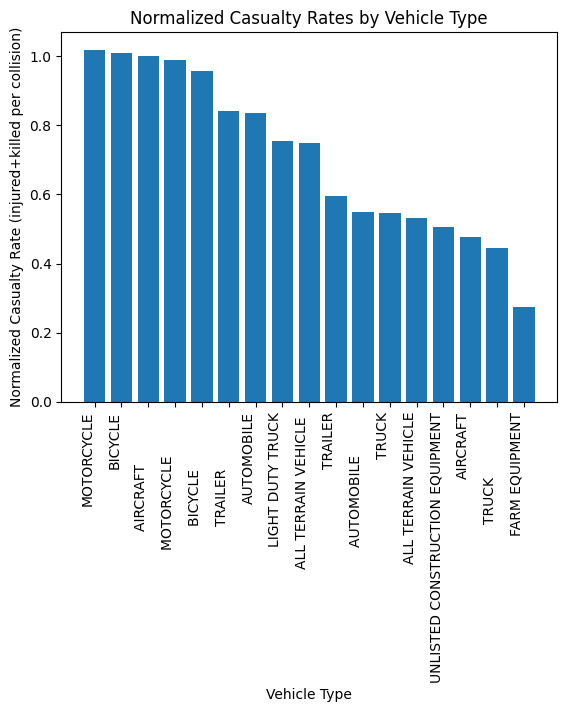

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('pd_collisions_details_datasd.csv')

# Dropping rows with veh type entry
df = pd.read_csv('pd_collisions_details_datasd.csv')

# Dropping rows with veh type entry
df = df.dropna(subset = ['veh_type'])

df['casualty_total'] = df['injured'] + df['killed']
grouped_data = df.groupby('veh_type').agg({'casualty_total': 'sum', 'veh_type': 'count'})

grouped_data['normalized_rate'] = grouped_data['casualty_total'] / grouped_data['veh_type']
grouped_data = grouped_data.sort_values(by='normalized_rate', ascending=False)

# Display mean and standard deviation
mean_normalized_rate = grouped_data['normalized_rate'].mean()
std_normalized_rate = grouped_data['normalized_rate'].std()

print(f"Mean Normalized Rate: {mean_normalized_rate:.2f}")
print(f"Standard Deviation of Normalized Rate: {std_normalized_rate:.2f}")

plt.bar(grouped_data.index, grouped_data['normalized_rate'])
plt.xlabel('Vehicle Type')
plt.ylabel('Normalized Casualty Rate (injured+killed per collision)')
plt.title('Normalized Casualty Rates by Vehicle Type')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.show()